### Import deps

In [2]:
# remove the warnings
import logging
logging.getLogger().setLevel(logging.ERROR)
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)
import matplotlib.pyplot as plt
import cv2
import PIL
import numpy as np
from dataLoader import get_saliency_data, imagenet_idx_to_label
from saliency import get_saliency_map, saliency_graph_cut
from model.utils import load_models, get_monet_style

### Saliency map

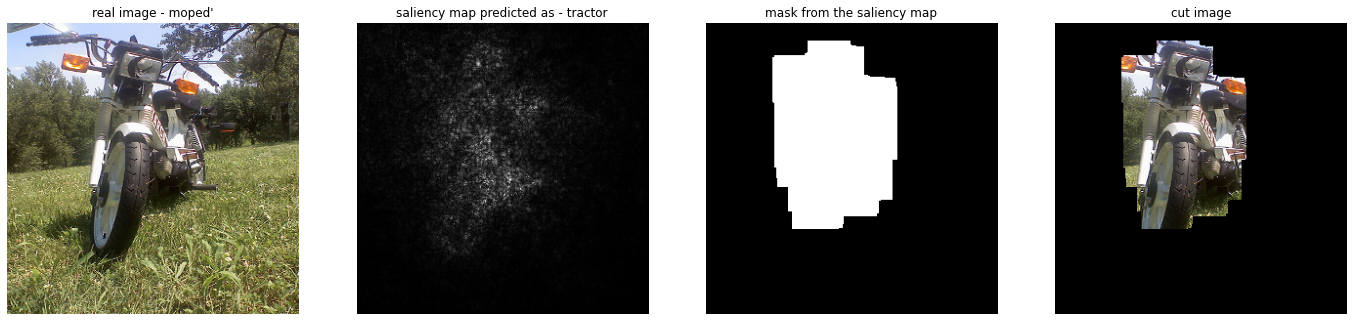

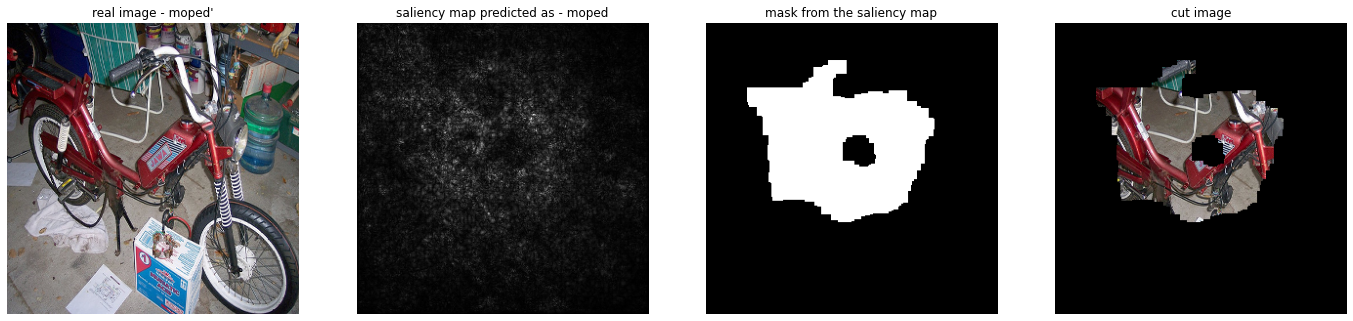

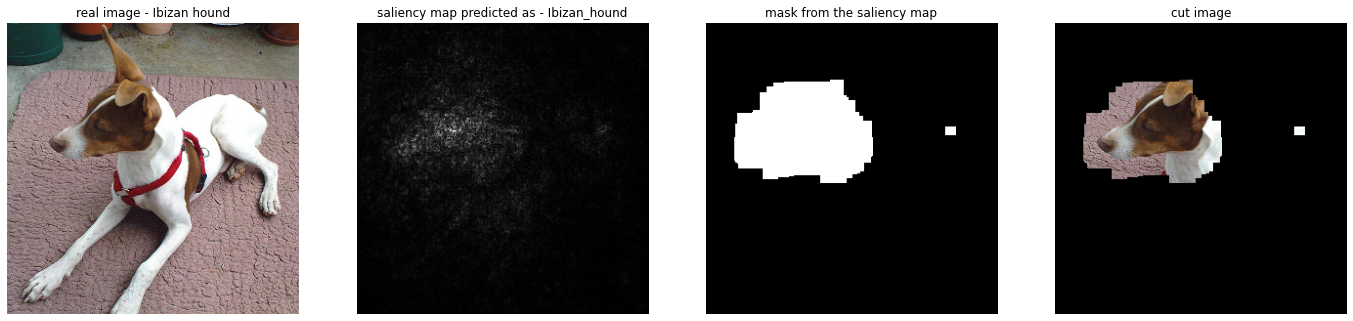

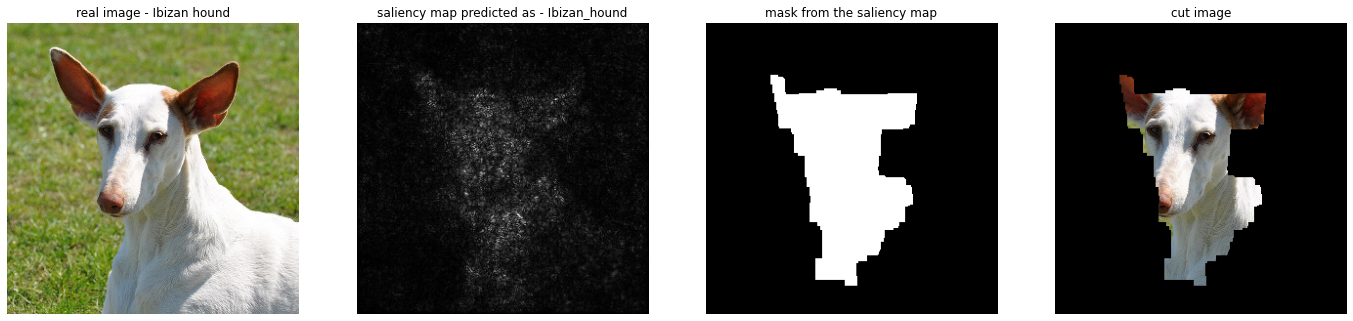

In [4]:
imgs, labels = get_saliency_data(img_shape=(299, 299))

# select some of the images
start, end = 14, 18
imgs, labels = imgs[start:end], labels[start:end]

saliency_map, pred_rets = get_saliency_map(imgs, labels)

cut_imgs, masks = saliency_graph_cut(imgs, saliency_map, .3, .95)
idx_map = imagenet_idx_to_label()


for idx in range(0, len(imgs)):
    img = imgs[idx]
    saliency_img = saliency_map[idx]
    mask = masks[idx]
    cut_img = cut_imgs[idx]

    label = idx_map[labels[idx]]
    pred_label = pred_rets[idx][0][1]

    f = plt.figure(figsize=(24, 24))

    plt.subplot(141)
    plt.title(f"real image - {label}")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(142)
    plt.title(f"saliency map predicted as - {pred_label}")
    plt.imshow(saliency_img, cmap='gray')
    plt.axis('off')

    plt.subplot(143)
    plt.title(f"mask from the saliency map")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(144)
    plt.title(f"cut image")
    plt.imshow(cut_img)
    plt.axis('off')

    plt.show()

### Saliency comparison between real and generated images

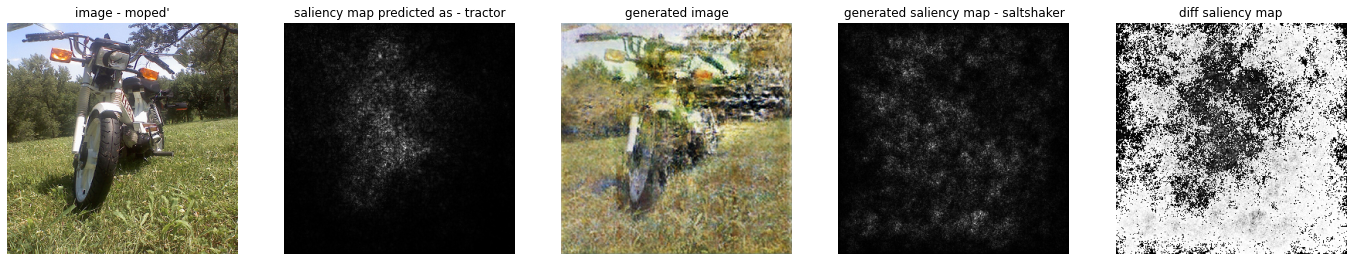

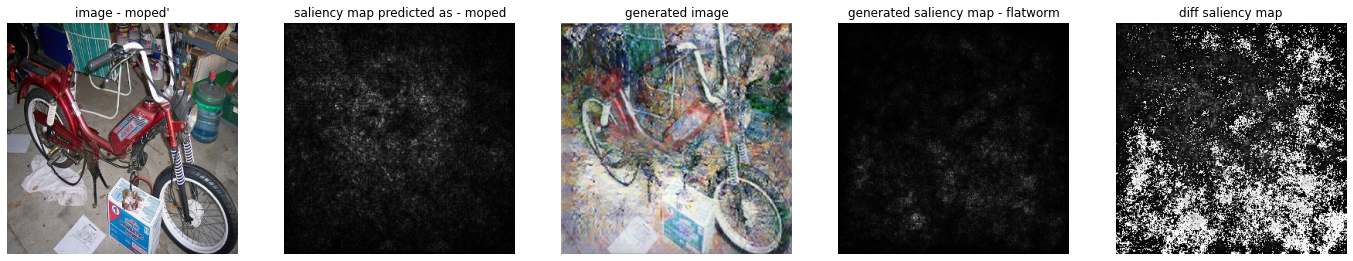

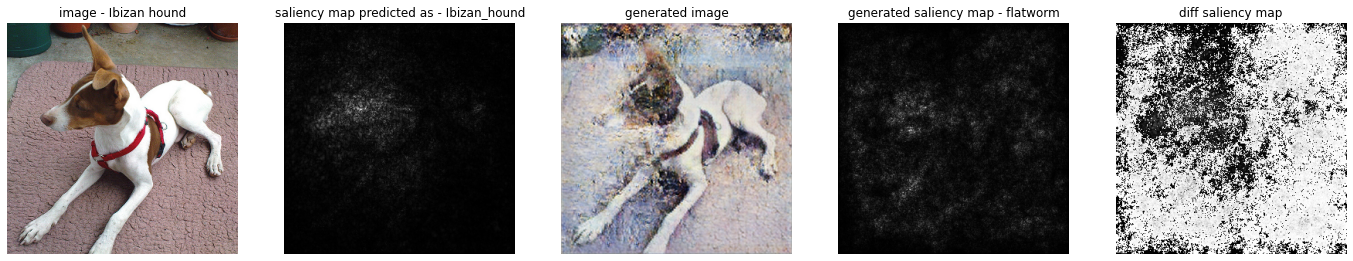

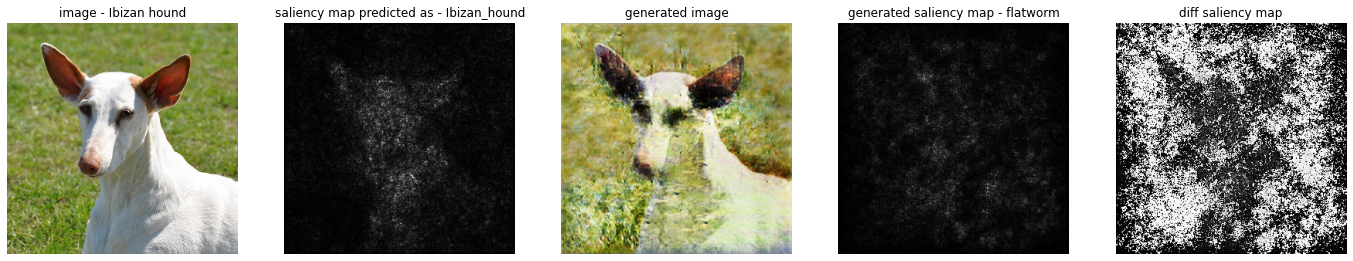

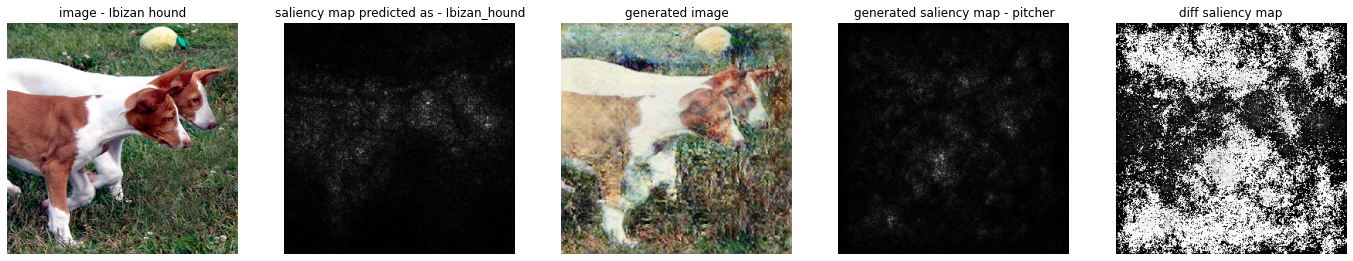

In [5]:
monet_generator = load_models(model='m_gen')

start, end = 14, 19

imgs, labels = get_saliency_data(img_shape=(299, 299))

# select some of the images
imgs, labels = imgs[start:end], labels[start:end]
# transfer the style
gen_monet_imgs = get_monet_style(
    imgs, monet_generator, output_shape=(299, 299))

# get the saliency map respectively
saliency_map, pred_rets = get_saliency_map(imgs, labels)
gen_saliency_map, gen_pred_rets = get_saliency_map(gen_monet_imgs, labels)

idx_map = imagenet_idx_to_label()

for idx in range(0, len(imgs)):
    img = imgs[idx]
    saliency_img = saliency_map[idx]
    gen_monet_img = gen_monet_imgs[idx]
    gen_saliency_img = gen_saliency_map[idx]

    diff_map = abs(saliency_img - gen_saliency_img)

    label = idx_map[labels[idx]]
    pred_label = pred_rets[idx][0][1]
    gen_pred_label = gen_pred_rets[idx][0][1]

    f = plt.figure(figsize=(24, 24))

    plt.subplot(151)
    plt.title(f"image - {label}")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(152)
    plt.title(f"saliency map predicted as - {pred_label}")
    plt.imshow(saliency_img, cmap='gray')
    plt.axis('off')

    plt.subplot(153)
    plt.title(f"generated image")
    plt.imshow(gen_monet_img, cmap='gray')
    plt.axis('off')

    plt.subplot(154)
    plt.title(f"generated saliency map - {gen_pred_label}")
    plt.imshow(gen_saliency_img, cmap='gray')
    plt.axis('off')

    plt.subplot(155)
    plt.title(f"diff saliency map")
    plt.imshow(diff_map, cmap='gray')
    plt.axis('off')

    plt.show()
